In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [26]:
df = pd.read_csv('C:\\Users\\souka\\OneDrive\\Bureau\\code\\Exercice_KNN\\Datasets\\etudiant.csv', encoding='latin-1')
print(df.head())
print(len(df))

   note_math  note_info  note_projet  assiduite  participation     classe
0         18         17           19         95             90  Excellent
1         17         16           18         88             85  Excellent
2         19         18           20         98             92  Excellent
3         16         15           17         82             78  Excellent
4         18         19           16         94             88  Excellent
91


In [27]:

df.isnull().sum().sum()


df = df.drop_duplicates()
print(f"Lignes après nettoyage : {len(df)}")


Lignes après nettoyage : 91


In [28]:


le = LabelEncoder()
df['classe'] = le.fit_transform(df['classe'])

In [29]:
X = df.iloc[:, 0:5]  
y = df.iloc[:, 5]

In [30]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)


In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
k_values = [3,4, 5, 7, 9,11,17,33,34]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


In [33]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[10  0  0]
 [ 0  7  2]
 [ 0  0  9]]


In [34]:
report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)


                precision    recall  f1-score   support

En difficultÃ©       1.00      1.00      1.00        10
     Excellent       1.00      0.78      0.88         9
         Moyen       0.82      1.00      0.90         9

      accuracy                           0.93        28
     macro avg       0.94      0.93      0.92        28
  weighted avg       0.94      0.93      0.93        28



In [35]:

import matplotlib.pyplot as plt

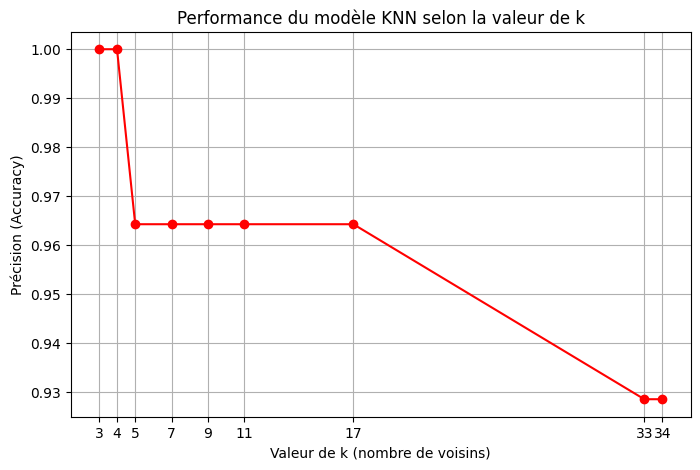

In [36]:
# Visualisation
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='r')
plt.title("Performance du modèle KNN selon la valeur de k")
plt.xlabel("Valeur de k (nombre de voisins)")
plt.ylabel("Précision (Accuracy)")
plt.grid(True)
plt.xticks(k_values)
plt.show()